In [1]:
import numpy as np 
import matplotlib.pyplot as plt

At first we have : 
- camera's parameters -> A (focal, center) 
- rotation matrix  -> R 
- position matrix -> C 
- 3D points position ->  P1 P2 P3 (and P4 to determinate the best solution after P3P)

In [2]:
# This script defines the camera parameters, rotation matrix, and translation matrix.
def camera() : 
  # Definition of the camera parameters
  # focal length
  fx = 800
  fy = 800
  # center
  cx = 320
  cy = 240

  A = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]]) # intraseca matrix of the camera (3*3)
  print("A = \n", A)
  return A

A = camera() 


def rotation_matrix() : 
  # Definition of the rotation matrix of the camera 
  R = np.array([[1, 0, 0],[0, -1, 0], [0, 0, -1]])
  print("R = \n",R)
  return R

def camera_position() : 
  # Definition of the translation matrix of the camera (the position)
  C = np.array([[0,0,6]])    # T = [tx,ty,tz]  (1*3)
  #C = C.reshape((3,1))                       # (3*1)
  print("C = \n",C)
  return C

R = rotation_matrix()
C = camera_position()

A = 
 [[800   0 320]
 [  0 800 240]
 [  0   0   1]]
R = 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
C = 
 [[0 0 6]]


In [3]:
# Definition of 3D points in the world coordinate system

def point3Daleatoire(x) :
  # Generation of one random points in 3D space 
  return np.array([[np.random.uniform(-x,x),np.random.uniform(-x,x),np.random.uniform(-x,x)]])

def pts_3D_4pts():
  # Generate randomly 4 3D points
  # Output : array which concatenate the 4 points = [ P1, P2, P3, P4 ] 

  P1 = point3Daleatoire(2)     # (1*3) -> pour P3P
  P2 = point3Daleatoire(2)
  P3 = point3Daleatoire(2)
  P4 = point3Daleatoire(2)
  
  points3D = np.concatenate((P1,P2,P3,P4),axis=0);     # (4 rows * 3 columns) - 1 row = 1 point
  print("points3D = \n", points3D)
  return points3D

P1 = np.array([0.7161, 0.5431, 1.7807])
P2 = np.array([-1.1643, 0.8371, -1.0551])
P3 = np.array([-1.5224, 0.4292, -0.1994])
P4 = np.array([-1.5224, 0.4292, -0.1994])

print("P1 = \n", P1)
print("P2 = \n", P2)
print("P3 = \n", P3)
print("P4 = \n", P4)

P1 = 
 [0.7161 0.5431 1.7807]
P2 = 
 [-1.1643  0.8371 -1.0551]
P3 = 
 [-1.5224  0.4292 -0.1994]
P4 = 
 [-1.5224  0.4292 -0.1994]


We create the 3 direction features vectors f1, f2, f3

In [4]:
def features_vectors(points3D,C,R) :
    '''
    This function computes the features vectors for P3P algorithm.
    args:
    points3D : array with the 4 3D points = [ P1, P2, P3, P4 ] (4*3) 
    but we only use the first three points for P3P
    C: camera position matrix : (1*3)
    R : camera rotation matrix : (3*3)
    returns:
    featuresVect : array with the features vectors (3*3)
    '''

    P1 = np.reshape(points3D[0],(3,1))  
    P2 = np.reshape(points3D[1],(3,1))
    P3 = np.reshape(points3D[2],(3,1))


    C = np.reshape(C,(3,1))     #(3*1)
   
    v1 = R @ (P1 - C)           # (3*1)
    v2 = R @ (P2 - C)
    v3 = R @ (P3 - C)

    f1 = v1/np.linalg.norm(v1)
    f2 = v2/np.linalg.norm(v2)
    f3 = v3/np.linalg.norm(v3)

    f1 = np.reshape(f1 / np.linalg.norm(f1),(1,3))
    f2 = np.reshape(f2 / np.linalg.norm(f2),(1,3))
    f3 = np.reshape(f3 / np.linalg.norm(f3),(1,3))

    
    featuresVect = np.concatenate((f1,f2,f3),axis=0)
    print("features vectors = \n",featuresVect)

    return featuresVect # Return the features vectors need in P3P (one row = one feature vector)



points3D = [P1, P2, P3]  # We define the points3D with the first three points
print("points3D = \n", points3D,"\n")  # Print the points3D to check the values

featuresVect = features_vectors(points3D,C,R) # call the function to get the features vectors OK

points3D = 
 [array([0.7161, 0.5431, 1.7807]), array([-1.1643,  0.8371, -1.0551]), array([-1.5224,  0.4292, -0.1994])] 

features vectors = 
 [[ 0.16599598 -0.12589362  0.97805733]
 [-0.16172274 -0.11627424  0.97996227]
 [-0.23794915 -0.06708341  0.96895821]]


Verification that the feature vectors are correctly computed : 

|| f 1 || =  1.0
|| f 2 || =  1.0
|| f 3 || =  1.0


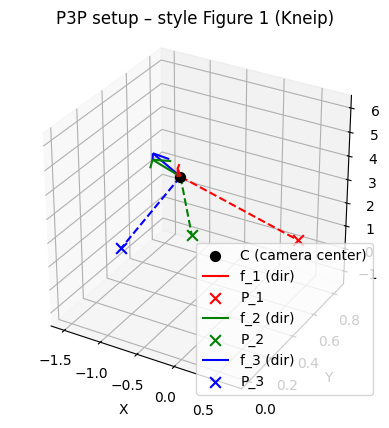

In [5]:
from mpl_toolkits.mplot3d import Axes3D

def plot_p3p_geometry(C_est, f_cam, P_world, scale=1.0):
    """
    Affiche le schéma P3P style 'Figure 1' du papier de Kneip.
    C_est   : (3,) centre caméra estimé
    f_cam   : (3,3) directions unitaires dans repère caméra
    P_world : (3,3) points 3D
    """
    C_est = np.array(C_est).flatten()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("P3P setup – style Figure 1 (Kneip)")

    colors = ['r', 'g', 'b']
    ax.scatter(C_est[0], C_est[1], C_est[2], c='k', label='C (camera center)', s=50)

    for i in range(3):
        Pi = P_world[i]
        print("|| f",i+1,"|| = ",np.linalg.norm(f_cam[i]))
        fi = f_cam[i] / np.linalg.norm(f_cam[i])  # s'assurer que c'est unitaire

        # Vecteur direction f_i depuis C (en échelle réduite pour visualiser)
        ax.quiver(*C_est, *(scale * fi), color=colors[i], label=f'f_{i+1} (dir)')
        # Ligne entre C et P_i
        ax.plot([C_est[0], Pi[0]], [C_est[1], Pi[1]], [C_est[2], Pi[2]], color=colors[i], linestyle='dashed')
        ax.scatter(Pi[0], Pi[1], Pi[2], color=colors[i], marker='x', s=60, label=f'P_{i+1}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1,1,1])
    ax.legend()
    plt.show()

plot_p3p_geometry(np.transpose(C),featuresVect,points3D)


Lastly we need the functions to resolve the polynomial roots. - for test go to test resolution polynome 

In [6]:
def sqrt_3(x) : # we define a function to compute the cubic root of a complex number
  if np.real(x) >= 0 :
    return x**(1/3)
  else :
    return -(-x)**(1/3)

  
def polynomial_root_calculation_3rd_degree(a,b,c,d): # cardan method
  # Solving a polynomial of 3rd degree  
  # Input : the 4th coefficiants of the polynomial 
  # Output : roots of the polynomial a*x^3 + b*x^2 + c*x + d = 0  -> array : [x1,x2,x3]

  # Calculation of the discriminant
  p = (3*a*c - b**2)/(3*a**2)
  q = (2* b**3 - 9*a*b*c + 27* a**2 *d ) / (27 * a**3)

  delta = - 4 * p**3 - 27* q**2 

  roots = []

  j_ = np.exp((2*1j*np.pi)/3)

  for k in range(3):

    u_k = j_**k * sqrt_3( 0.5 * (-q + np.sqrt(-delta/27,dtype=complex)) )
    v_k = j_**(-k) * sqrt_3( 0.5 * (-q - np.sqrt(-delta/27,dtype=complex)))

    roots.append((u_k + v_k)- b/(3*a))

  return np.array(roots)


def polynomial_root_calculation_4th_degree_ferrari(a): # Ferrari's Method
    # Solving a polynomial of 4th degree

    # Input : array 5*1 with the 5 coefficiants of the polynomial 
    # Output : roots of the polynomial a[4]*x^4 + a[3]*x^3 + a[2]*x^2 + a[1]*x + a[0]   -> array : [x1,x2,x3,x4]  (4*1)

    if np.shape(a)[0] != 5 :
      print("Expeted 5 coefficiants for a 4th order polynomial")
      return

    a0 = a[0]   
    a1 = a[1]
    a2 = a[2]
    a3 = a[3]
    a4 = a[4]

    # Reduce the quartic equation to the form : x^4 + a*x^3 + b*x^2 + c*x + d = 0
    a = a3/a4
    b = a2/a4
    c = a1/a4
    d = a0/a4

    # Computation of the coefficients of the Ferrari's Method
    S = a/4
    b0 = d - c*S + b* S**2 - 3* S**4
    b1 = c - 2*b*S + 8*S**3
    b2 = b - 6 * S**2


    # Solve the cubic equation m^3 + b2*m^2 + (b2^2/4  - b0)*m - b1^2/8 = 0
    x_cube = polynomial_root_calculation_3rd_degree(1,b2,(b2**2)/4-b0,(-b1**2)/8)

    # Find a real and positive solution
    alpha_0 = 0
    for r in x_cube :
      if np.isclose(np.imag(r),0) and np.real(r) > 0 :
        alpha_0 = r

    if alpha_0 !=0 :
      x1 = np.sqrt(alpha_0/2) - S  + np.sqrt( -alpha_0/2 - b2/2 - b1/(2*np.sqrt(2*alpha_0)),dtype = complex)
      x2 = np.sqrt(alpha_0/2) - S - np.sqrt( -alpha_0/2 - b2/2 - b1/(2*np.sqrt(2*alpha_0,)),dtype = complex)
      x3 = - np.sqrt(alpha_0/2) - S + np.sqrt( -alpha_0/2 - b2/2 + b1/(2*np.sqrt(2*alpha_0)),dtype = complex)
      x4 = - np.sqrt(alpha_0/2) - S - np.sqrt( -alpha_0/2 - b2/2 + b1/(2*np.sqrt(2*alpha_0)),dtype = complex)

    else :
      x1 = - S + np.sqrt(-b2/2 + np.sqrt((b2**2)/4 - b0),dtype = complex)
      x2 = - S - np.sqrt(-b2/2 + np.sqrt((b2**2)/4 - b0),dtype = complex)
      x3 = - S + np.sqrt(-b2/2 - np.sqrt((b2**2)/4 - b0),dtype = complex)
      x4 = - S - np.sqrt(-b2/2 - np.sqrt((b2**2)/4 - b0),dtype = complex)
    return np.array([x1,x2,x3,x4])

We have all the variables needed for the p3p so we start

1. Storage of points : already done 

In [7]:
print("P1 = ",P1)
print("P2 = ",P2)
print("P3 = ",P3)

P1 =  [0.7161 0.5431 1.7807]
P2 =  [-1.1643  0.8371 -1.0551]
P3 =  [-1.5224  0.4292 -0.1994]


2. Storage of the features vectors : done

In [8]:
# we got featuresVect and we access the 3 values 
f1 = featuresVect[0]
f2 = featuresVect[1]
f3 = featuresVect[2]

print("f1 = ", f1)
print("f2 = ", f2)
print("f3 = ", f3)

f1 =  [ 0.16599598 -0.12589362  0.97805733]
f2 =  [-0.16172274 -0.11627424  0.97996227]
f3 =  [-0.23794915 -0.06708341  0.96895821]


3. Création of a solution variable : maximum 4 solutions  

    Matrix (4,3,4)  
    Each layer is a solution, for each leayer : first column stres the camera position matrix C (3,1) and the remaining 3 columns store the rotation matrix R (3,3)

In [9]:
solutions = np.zeros((4,3,4))
print("solutions = \n", solutions)

solutions = 
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


4. Verification that the 3 points given are not collinear 

In [10]:
# Test of non-collinearity
v1 = P2 - P1
v2 = P3 - P1
if np.linalg.norm(np.cross(v1,v2))==0 :
    print('Problem: the points must not be collinear')
else:
    print('The points are not collinear : P3P can be correctly applied ')

The points are not collinear : P3P can be correctly applied 


5. Creation of an orthonormal frame from f1, f2, f3 (the features vectors)

In [11]:
# Calculation of vectors of the base τ = (C,tx,ty,tz)
tx = f1     
print("tx = ", tx)

tz = np.cross(f1,f2)/np.linalg.norm(np.cross(f1,f2))
print("tz = ", tz)

ty = np.cross(tz,tx)
print("ty = ", ty)

tx =  [ 0.16599598 -0.12589362  0.97805733]
tz =  [-0.02983063 -0.99200453 -0.12262602]
ty =  [-0.98567513  0.00882064  0.16842425]


Display for the verification of non-collinearity of the 3 vectors 

tx = [ 0.16599598 -0.12589362  0.97805733]
ty = [-0.98567513  0.00882064  0.16842425]
tz = [-0.02983063 -0.99200453 -0.12262602]

Orthogonality verification :
tx · ty = 0.0
tx · tz = -1.3877787807814457e-17
ty · tz = -3.469446951953614e-18


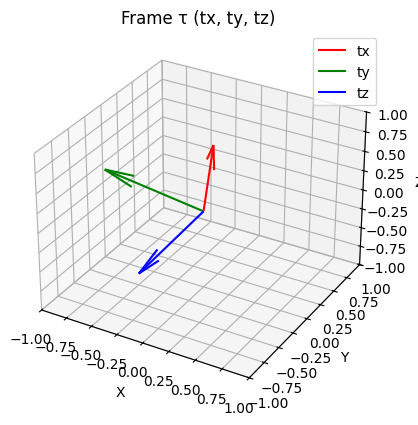

In [12]:
print("tx =", tx)
print("ty =", ty)
print("tz =", tz)

print("\nOrthogonality verification :")
print("tx · ty =", np.dot(tx, ty))
print("tx · tz =", np.dot(tx, tz))
print("ty · tz =", np.dot(ty, tz))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *tx, color='r', label='tx')
ax.quiver(*origin, *ty, color='g', label='ty')
ax.quiver(*origin, *tz, color='b', label='tz')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Frame τ (tx, ty, tz)')
ax.legend()
plt.show()


5. (bis) Creation of a transformation matrix T and expression of the f3 vector in this frame

In [13]:
tx = np.reshape(tx,(1,3))   # (1*3)
ty = np.reshape(ty,(1,3))
tz = np.reshape(tz,(1,3))

# Computation of the matrix T and the feature vector f3
T = np.concatenate((tx,ty,tz),axis = 0) # (3*3)
f3_T = np.dot(T,f3) # (3,)

print("tx = \n", tx)
print("ty = \n", ty)
print("tz = \n", tz)
print("f3_T = \n", f3_T)
print("T = \n", T)



tx = 
 [[ 0.16599598 -0.12589362  0.97805733]]
ty = 
 [[-0.98567513  0.00882064  0.16842425]]
tz = 
 [[-0.02983063 -0.99200453 -0.12262602]]
f3_T = 
 [ 0.91664345  0.39714491 -0.04517427]
T = 
 [[ 0.16599598 -0.12589362  0.97805733]
 [-0.98567513  0.00882064  0.16842425]
 [-0.02983063 -0.99200453 -0.12262602]]


The condition that the z-coordinate in f3_T must be negative has to be satisfied; otherwise, the order of the vectors is reversed in order to change the sign of theta.

In [14]:
f3_T_positif = False

# Having teta in [ 0, pi ] 
if f3_T[2] > 0 :
    f3_T_positif = True
    '''
    f1 = featuresVect[1]
    print("f1 = ", f1)
    f2 = featuresVect[0]
    print("f2 = ", f2)
    f3 = featuresVect[2]
    print("f3 = ", f3)


    # Re calculation of vectors of the base τ = (C,tx,ty,tz) to ensure orthogonality
    tx = f1         # (3,)
    tz = np.cross(f1,f2)/np.linalg.norm(np.cross(f1,f2))
    ty = np.cross(tz,tx)

    tx = np.reshape(tx,(1,3))   # (1*3)
    print("tx = \n", tx)
    ty = np.reshape(ty,(1,3))
    print("ty = \n", ty)
    tz = np.reshape(tz,(1,3))
    print("tz = \n", tz)

    # Computation of the matrix T and the feature vector f3
    T = np.concatenate((tx,ty,tz),axis = 0) # (3*3)
    print("T = \n", T) 
    f3_T= np.dot(T,f3) # (3,)
    '''

6. Change of frame is performed on the 3D points side, and the transformation matrix N is defined

In [15]:
# Calculation of vectors of the base η = (P1,nx,ny,nz)
nx = (P2 - P1)/np.linalg.norm(P2 - P1)      #(3,)
nz = np.cross(nx,P3-P1)/np.linalg.norm(np.cross(nx,P3-P1))  
ny = np.cross(nz,nx)
print("nx = ", nx)
print("ny = ", ny)
print("nz = ", nz)

# Reshape the vectors to (1,3) for concatenation
nx = np.reshape(nx,(1,3))  # (1,3)
ny = np.reshape(ny,(1,3))
nz = np.reshape(nz,(1,3))
print("nx = \n", nx)
print("ny = \n", ny)
print("nz = \n", nz)

# Computation of the matrix N and the world point P3
N = np.concatenate((nx,ny,nz),axis = 0) # (3*3) T's equivalent in the world coordinate system
P3_N = np.dot(N,P3-P1) # (3,)

print("N = \n", N)
print("P3_n = \n", P3_N)

nx =  [-0.55058527  0.08608385 -0.83032851]
ny =  [-0.77466775 -0.42330379  0.46979121]
nz =  [-0.31103977  0.90188884  0.29975122]
nx = 
 [[-0.55058527  0.08608385 -0.83032851]]
ny = 
 [[-0.77466775 -0.42330379  0.46979121]]
nz = 
 [[-0.31103977  0.90188884  0.29975122]]
N = 
 [[-0.55058527  0.08608385 -0.83032851]
 [-0.77466775 -0.42330379  0.46979121]
 [-0.31103977  0.90188884  0.29975122]]
P3_n = 
 [2.86681366e+00 8.52074476e-01 1.22990009e-16]


7. Definition of the variables for the following steps 

In [16]:
# Computation of phi1 et phi2 with f3_T = [f3,x ; f3,y ; f3,z] 
phi1 = f3_T[0]/f3_T[2]
phi2 = f3_T[1]/f3_T[2]
print("phi1 = ", phi1)
print("phi2 = ", phi2)

# Extraction of p1 and p2 from P3_T
p1 = P3_N[0] #x
p2 = P3_N[1] #y
print("p1 = ", p1)
print("p2 = ", p2)

# Computation of d12
d12 = np.linalg.norm(P2-P1)
print("d12 = ", d12)

# Computation of b = cot(beta)
cosBeta = np.dot(f1,f2)/(np.linalg.norm(f1)*np.linalg.norm(f2)) 
print("cosBeta = ", cosBeta)  
b = np.sqrt(1/(1-cosBeta**2)-1)

if cosBeta < 0 :
    b = -b
print("b = ", b)

phi1 =  -20.291273786147514
phi2 =  -8.791396593921807
p1 =  2.8668136593135083
p2 =  0.8520744760720703
d12 =  3.4152747766468217
cosBeta =  0.9462521400867492
b =  2.9256794072780483


8. Calculation of the coefficients of the polynomial 

In [17]:
a4 = - phi2**2 * p2**4 - phi1**2 * p2**4 - p2**4
a3 = 2 * p2**3 * d12 * b + 2 * phi2**2 * p2**3 * d12 * b - 2 * phi1 * phi2 * p2**3 * d12
a2 = - phi2**2 * p1**2 * p2**2 - phi2**2 * p2**2 * d12**2 * b**2 - phi2**2 * p2**2 * d12**2 + phi2**2 * p2**4 + phi1**2 * p2 **4 + 2 * p1 * p2**2 * d12 + 2 * phi1 * phi2 * p1 * p2**2 * d12 * b - phi1**2 * p1**2 * p2**2 + 2 * phi2**2 * p1 * p2**2 * d12 - p2**2 * d12**2 * b**2 - 2 * p1**2 * p2**2
a1 = 2 * p1**2 * p2 * d12 * b + 2 * phi1 * phi2 * p2**3 * d12 - 2 * phi2**2 * p2**3 * d12 * b - 2 * p1 * p2 * d12**2 * b
a0 = - 2 * phi1 * phi2 * p1 * p2**2 * d12 * b + phi2**2 * p2**2 * d12**2 + 2 * p1**3 * d12 - p1**2 * d12**2 + phi2**2 * p1**2 * p2**2 - p1**4 - 2 * phi2**2 * p1 * p2**2 * d12 + phi1**2 * p1**2 * p2**2 + phi2**2 * p2**2 * d12**2 * b**2

print("a4 = ", a4)
print("a3 = ", a3)
print("a2 = ", a2)
print("a1 = ", a1)
print("a0 = ", a0)


a4 =  -258.30212025178855
a3 =  214.06407775251876
a2 =  -468.5401290499489
a1 =  -228.4748348504754
a0 =  653.639057790645


9. Recovery of the polynomial roots cos (teta)

In [18]:
# Computation of the roots

roots = polynomial_root_calculation_4th_degree_ferrari(np.array([a0,a1,a2,a3,a4])) 

print("roots = \n", roots)

roots = 
 [ 0.4313253 +1.60436442j  0.4313253 -1.60436442j  0.94071362+0.j
 -0.97462895-0.j        ]


10. For each solution : computation of the camera position and rotation matrix

In [23]:
# For each solution of the polynomial
for i in range(4):
  #if np.isclose(np.imag(roots[i]),0) : # if real solution 

    # Computation of trigonometrics forms
    cos_teta = np.real(roots[i])

    if f3_T_positif == True : # teta in [-pi,0]
      sin_teta = - np.sqrt(1-cos_teta**2)
    else : # f3_T négatif donc teta in [0,pi]
      sin_teta = np.sqrt(1-cos_teta**2)
    
    cot_alpha = ((phi1/phi2)*p1 + cos_teta*p2 -d12*b )/ ((phi1/phi2)*cos_teta* p2 - p1 + d12)
    print("cot_alpha = ", cot_alpha)

    sin_alpha = np.sqrt(1/(cot_alpha**2+1))
    print("sin_alpha = ", sin_alpha)
    cos_alpha= np.sqrt(1-sin_alpha**2)
    print("cos_alpha = ", cos_alpha)
    
    if cot_alpha < 0 :
      cos_alpha = -cos_alpha

    # Computation of the intermediate rotation's matrixs
    C_estimate = [d12*cos_alpha*(sin_alpha*b + cos_alpha), d12*sin_alpha*cos_teta*(sin_alpha*b+cos_alpha), d12*sin_alpha*sin_teta*(sin_alpha*b+cos_alpha)]     # (3,)
 
    Q = [[-cos_alpha, -sin_alpha*cos_teta, -sin_alpha*sin_teta], [sin_alpha, -cos_alpha*cos_teta, -cos_alpha*sin_teta], [0, -sin_teta, cos_teta]]      # (3*3)
    print("Q = \n", Q)

    # Computation of the absolute camera center
    C_estimate = P1 + np.transpose(N) @ C_estimate  # (3,)
    C_estimate= C_estimate[:,np.newaxis]   # (3,1)
    print("C_estimate = \n", C_estimate)
    # Computation of the orientation matrix
    R_temp = np.transpose(Q) @ T
    print("R_temp = \n", R_temp)
    R_estimate = np.transpose(N) @ R_temp   # (3*3)
    print("R_estimate = \n", R_estimate)
    # Adding C and R to the solutions
    solutions[i,:,:1]= C_estimate
    solutions[i,:,1:] = R_estimate




cot_alpha =  -2.1533381842583528
sin_alpha =  0.42119302455855845
cos_alpha =  0.9069710227252101
Q = 
 [[0.9069710227252101, -0.18167120729682493, -0.3799988636510648], [0.42119302455855845, 0.3911995476525678, 0.8182660630746212], [0, -0.9021964787981277, 0.43132529910064354]]
C_estimate = 
 [[0.98322484]
 [0.75167905]
 [2.83875073]]
R_temp = 
 [[-0.26460594 -0.11046667  0.95800877]
 [-0.38883927  0.92130487 -0.0011646 ]
 [-0.8824895  -0.37281959 -0.28673652]]
R_estimate = 
 [[ 0.7213987  -0.53692213 -0.43737688]
 [-0.65408859 -0.73574307 -0.17564241]
 [-0.22749071  0.41279143 -0.88195873]]
cot_alpha =  -2.1533381842583528
sin_alpha =  0.42119302455855845
cos_alpha =  0.9069710227252101
Q = 
 [[0.9069710227252101, -0.18167120729682493, -0.3799988636510648], [0.42119302455855845, 0.3911995476525678, 0.8182660630746212], [0, -0.9021964787981277, 0.43132529910064354]]
C_estimate = 
 [[0.98322484]
 [0.75167905]
 [2.83875073]]
R_temp = 
 [[-0.26460594 -0.11046667  0.95800877]
 [-0.3888392

In [24]:
print("solutions = \n", solutions)

solutions = 
 [[[ 9.83224841e-01  7.21398703e-01 -5.36922132e-01 -4.37376880e-01]
  [ 7.51679051e-01 -6.54088592e-01 -7.35743066e-01 -1.75642405e-01]
  [ 2.83875073e+00 -2.27490712e-01  4.12791431e-01 -8.81958735e-01]]

 [[ 9.83224841e-01  7.21398703e-01 -5.36922132e-01 -4.37376880e-01]
  [ 7.51679051e-01 -6.54088592e-01 -7.35743066e-01 -1.75642405e-01]
  [ 2.83875073e+00 -2.27490712e-01  4.12791431e-01 -8.81958735e-01]]

 [[ 7.21644966e-15  1.00000000e+00 -8.34070163e-16 -1.47285104e-15]
  [ 4.66293670e-15 -8.15043626e-16 -1.00000000e+00 -7.20765598e-16]
  [ 6.00000000e+00 -1.41591196e-15  7.39619075e-16 -1.00000000e+00]]

 [[-1.25864955e+00  8.47829541e-01 -5.19199262e-01  1.07783094e-01]
  [ 2.26707244e+00  5.27913852e-01  8.07308662e-01 -2.63741710e-01]
  [-3.99101139e+00  4.99202756e-02  2.80508201e-01  9.58552615e-01]]]


11. Reprojection of points in 2D from the newly estimated matrices to verify the estimation error.

In [21]:
def projection3D2D(point3D,C,R,A) :
  # 3D point = [ Xw, Yw, Zw ]'   (1*3)
  # C : camera position matrix : (3*1)
  # R : camera rotation matrix : (3*3)
  # A : intraseca matrix of the camera : (3*3)
  # Output : return the coordonates of the point in 2D 

  PI = np.concatenate((np.eye(3),np.zeros((3,1))),axis=1)  # (3*4)
  
  Rt = np.concatenate((R,C),axis=1)               # (3*4)
  Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)   # (4*4)

  point3D_bis = np.concatenate((np.reshape(point3D,(3,1)),np.array([[1]])),axis=0)   #(4*1)
 
  point2D = A @ PI @ Rt @ point3D_bis   # 2D point = [u, v, w] (3*1)
  point2D = point2D / point2D[2]        # 2D point = [u, v, 1] (3*1)
  return point2D[:2]

print("pt3D",points3D)
# Example usage of the projection function
print("pt3D[0]",points3D[0],type(points3D[0]))
print("C",C)
print("R",R)
print("A",A)
C_transpose = np.reshape(C,(3,1))

p1 = projection3D2D(points3D[0],C_transpose,R,A)
print("p1 = ", p1)
p2 = projection3D2D(points3D[1],C_transpose,R,A)
print("p2 = ", p2)
p3 = projection3D2D(points3D[2],C_transpose,R,A)
print("p3 = ", p3)
p4 = projection3D2D(P4,C_transpose,R,A)
print("p4 = ", p4)

# Concatenation of the 4 3D points to compute the error
new_points3D = np.concatenate((points3D, P4.reshape(1, 3)), axis=0)



pt3D [array([0.7161, 0.5431, 1.7807]), array([-1.1643,  0.8371, -1.0551]), array([-1.5224,  0.4292, -0.1994])]
pt3D[0] [0.7161 0.5431 1.7807] <class 'numpy.ndarray'>
C [[0 0 6]]
R [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
A [[800   0 320]
 [  0 800 240]
 [  0   0   1]]
p1 =  [[455.7760766 ]
 [137.02557296]]
p2 =  [[187.97635753]
 [145.07859563]]
p3 =  [[123.54227828]
 [184.6139949 ]]
p4 =  [[123.54227828]
 [184.6139949 ]]


12. Calculation of errors = distance between the 2D points estimated from the found rotation and position matrices and the 2D points from the initial matrices

In [ ]:
def distance(pt, pt_estimation):
    # Euclidean distance between 2 points  
    erreur = 0
    for i in range(len(pt)):
      erreur += (pt[i] - pt_estimation[i])**2
    return np.sqrt(erreur)

import matplotlib.pyplot as plt


def print_results(solutions,points2D,points3D,A) : 
   print("pt 2D",points2D)
   # Compute the error of estimation for each points after the P3P algorithm 

   # solutions : solution matrix returned by P3P (4*3*4)
   # points 3D : 4 pts 3D used for P3P 
   # points 2D : 4 pts 2D used for P3P (image of the 3D points)
   
   P1 = points3D[0]
   P2 = points3D[1]
   P3 = points3D[2]
   P4 = points3D[3]

   erreurs = []
   nb_sol = 0

   for i in range(len(solutions)) : 
      R = solutions[i,:,1:]   # Rotation matrix (3*3)
      C = solutions[i,:,:1]   # Position matrix (3*1)

      if not np.all(R==np.zeros((3,3))) : 
        nb_sol += 1 
        print("------------ Solution n° : ",nb_sol,"----------------")
        print("R = \n",R,)
        print("C = \n",C,)

        p1_P3P = np.reshape(projection3D2D(P1,C,R,A),(1,2))
        p2_P3P = np.reshape(projection3D2D(P2,C,R,A),(1,2))
        p3_P3P = np.reshape(projection3D2D(P3,C,R,A),(1,2))
        p4_P3P = np.reshape(projection3D2D(P4,C,R,A),(1,2))
        pt_2D_P3P = np.concatenate((p1_P3P,p2_P3P,p3_P3P,p4_P3P),axis=0)    # (4,2)

        erreurs.append([0])
        for j in range(len(points2D)):
            erreur_pt = distance(points2D[j],pt_2D_P3P[j])
            print("erreur P",j+1," = ",erreur_pt)
            erreurs[i]+=erreur_pt

   # Find the best solution (with the smallest estimation error)     
   indice_min = 0
   min = erreurs[0]
   for i in range(1,len(erreurs)) :
    if erreurs[i]<min :
      min = erreurs[i]
      indice_min = i

   R_opti = solutions[indice_min,:,1:] 
   C_opti = solutions[indice_min,:,:1]
   
   print("\n------------ Best solution : ----------------")
   print("Solution n° :",indice_min+1,"\n")
   print("R estimé = \n", R_opti,"\n")
   print("C estimé = \n", C_opti, "\n")



   

In [23]:
print_results(solutions, [p1, p2, p3, p4], new_points3D, A)

pt 2D [array([[455.7760766 ],
       [137.02557296]]), array([[187.97635753],
       [145.07859563]]), array([[123.54227828],
       [184.6139949 ]]), array([[123.54227828],
       [184.6139949 ]])]
------------ Solution n° :  1 ----------------
R = 
 [[ 0.7213987  -0.53692213 -0.43737688]
 [-0.65408859 -0.73574307 -0.17564241]
 [-0.22749071  0.41279143 -0.88195873]]
C = 
 [[0.98322484]
 [0.75167905]
 [2.83875073]]
erreur P 1  =  [197.77510129]
erreur P 2  =  [333.74904825]
erreur P 3  =  [410.90942502]
erreur P 4  =  [410.90942502]
------------ Solution n° :  2 ----------------
R = 
 [[ 0.7213987  -0.53692213 -0.43737688]
 [-0.65408859 -0.73574307 -0.17564241]
 [-0.22749071  0.41279143 -0.88195873]]
C = 
 [[0.98322484]
 [0.75167905]
 [2.83875073]]
erreur P 1  =  [197.77510129]
erreur P 2  =  [333.74904825]
erreur P 3  =  [410.90942502]
erreur P 4  =  [410.90942502]
------------ Solution n° :  3 ----------------
R = 
 [[ 1.00000000e+00 -8.36292571e-16 -1.47305585e-15]
 [-8.13873194e-16

- initialisation_parametres.py : functions to define the camera position, rotation and intraseca matrix, the 3D features points, the 2D points and the features vectors
- P3P_openCV.py : function to compute the results of opencv version of P3P in the same shape as the numpy's version
- P3P_numpy.py : function to compute the solution of P3P in numpy, and resolution of polynomial equation needed for P3P (3rd and 4th degree)
- print_results.py : function to print the results : R and C matrix found, and estiamation error for each point
- test_numpy.py : script to launch the tests of the numpy version 
- test_openCV.py : script to launch the tests of the opencv version 

